# Metal Bands by Nation

The data sets within contain information on metal bands
https://www.kaggle.com/mrpantherson/metal-by-nation

In [321]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [322]:
bands = pd.read_csv('metal_bands_2017.csv', encoding='windows-1252', na_values='-', index_col=0)
bands.head()

band_name  fans  formed          origin   split  \
0  Iron Maiden  4195  1975.0  United Kingdom     NaN   
1        Opeth  4147  1990.0          Sweden  1990.0   
2    Metallica  3712  1981.0             USA     NaN   
3     Megadeth  3105  1983.0             USA  1983.0   
4  Amon Amarth  3054  1988.0          Sweden     NaN   

                                              style  
0                   New wave of british heavy,Heavy  
1  Extreme progressive,Progressive rock,Progressive  
2                             Heavy,Bay area thrash  
3                            Thrash,Heavy,Hard rock  
4                                     Melodic death

In [323]:
bands.describe()

fans       formed        split
count  5000.000000  4996.000000  2785.000000
mean     87.805800  2000.416533  2001.239497
std     296.137523     8.884581     8.940120
min       0.000000  1964.000000  1965.000000
25%       4.000000  1995.000000  1996.000000
50%      12.000000  2002.000000  2003.000000
75%      42.000000  2007.000000  2008.000000
max    4195.000000  2016.000000  2016.000000

As we can see, four bands do not have a value in the column 'formed'. Let's look at them:

In [324]:
bands[bands.formed.isnull()]

band_name  fans  formed          origin  split  \
4442  Throes Of Sanity     2     NaN             USA    NaN   
4599        Doomocracy     1     NaN          Greece    NaN   
4821          Rustless     1     NaN           Italy    NaN   
4948         Weapon UK     1     NaN  United Kingdom    NaN   

                                style  
4442                         Us power  
4599                             Doom  
4821                            Heavy  
4948  New wave of british heavy,Heavy

We are very lucky that there are only four such bands. If there were more of them, we would have to take this into account in the study. But now we can slightly cheat and fill these dates manually.
Necessary data can be found at https://www.metal-archives.com <br>
[Throes Of Sanity](https://www.metal-archives.com/bands/Throes_of_Sanity/29856): 1992 <br>
[Doomocracy](https://www.metal-archives.com/bands/Doomocracy/3540386346): 2011 <br>
[Rustless](https://www.metal-archives.com/bands/Rustless/126189): 2007 <br>
[Weapon UK](https://www.metal-archives.com/bands/Weapon_UK/6880): 1980 <br>
Now we can fill missing values:

In [325]:
bands.loc[4442, 'formed'] = 1992 #Throes Of Sanity
bands.loc[4599, 'formed'] = 2011 #Doomocracy
bands.loc[4821, 'formed'] = 2007 #Rustless
bands.loc[4948, 'formed'] = 1980 #Weapon UK

bands.formed = bands.formed.astype('int16') # Now we can cast years to integer

Check that everything is fine:

In [326]:
bands.formed.hasnans

False

But our data also have a bunch of non-numeric columns:

In [327]:
bands.describe(include = ['object'])

band_name origin  style
count       5000   4992   5000
unique      4949    113   1227
top      Pantera    USA  Black
freq           2   1139    345

And again a few missed values in *origin* column:

In [328]:
bands[bands.origin.isnull()]

band_name  fans  formed origin   split  \
460                   Enshine   175    2009    NaN     NaN   
989                    Clouds    61    2013    NaN  2013.0   
1422  Subterranean Masquerade    35    1997    NaN     NaN   
2614     Twilight Of The Gods    11    2010    NaN     NaN   
2996                Archivist     7    2015    NaN     NaN   
3444  Metallic Taste Of Blood     5    2011    NaN     NaN   
3941                 Level 10     3    2014    NaN  2014.0   
4201            Death Penalty     2    2013    NaN  2013.0   

                             style  
460                    Gothic doom  
989               Atmospheric doom  
1422  Progressive,Psychedelic rock  
2614                         Heavy  
2996  Atmospheric black,Post-metal  
3444      Progressive,Instrumental  
3941                   Heavy,Power  
4201                    Doom,Heavy

Let's get rid of them too and say, that this is 'International' bands. <br>
(This is truth by the way. You can check Metal Archive: [Enshine](https://www.metal-archives.com/bands/Enshine/3540364642), [Clouds](https://www.metal-archives.com/bands/Clouds/3540381712), [Subterranean Masquerade](https://www.metal-archives.com/bands/Subterranean_Masquerade/16569) and so on)

In [329]:
bands.loc[bands.origin.isnull(), 'origin'] = 'International'

Also, you can see that there is a mess in *style* column. I guess we should categorize that information. <br>
Let's see how many unique styles do we have:

In [330]:
bands

band_name  fans  formed          origin   split  \
0               Iron Maiden  4195    1975  United Kingdom     NaN   
1                     Opeth  4147    1990          Sweden  1990.0   
2                 Metallica  3712    1981             USA     NaN   
3                  Megadeth  3105    1983             USA  1983.0   
4               Amon Amarth  3054    1988          Sweden     NaN   
5                    Slayer  2955    1981             USA  1981.0   
6                     Death  2690    1983             USA  2001.0   
7             Dream Theater  2329    1985             USA  1985.0   
8             Black Sabbath  2307    1968  United Kingdom     NaN   
9                 Nightwish  2183    1996         Finland  1996.0   
10        Children Of Bodom  2153    1993         Finland     NaN   
11             Judas Priest  2094    1969  United Kingdom  1969.0   
12           Blind Guardian  2040    1984         Germany     NaN   
13                In Flames  1932    1990          Sweden  1990.0   
14                  Pantera  1920    1981             USA  2003.0   
15        Dark Tranquillity  1898    1989          Sweden  1989.0   
16                 Agalloch  1881    1995             USA  2016.0   
17                Ensiferum  1879    1995         Finland  1995.0   
18               Arch Enemy  1750    1996          Sweden     NaN   
19                Katatonia  1735    1991          Sweden  1991.0   
20                 Behemoth  1721    1991          Poland     NaN   
21             Dimmu Borgir  1688    1993          Norway  1993.0   
22                  Kreator  1646    1982         Germany     NaN   
23                Wintersun  1640    2004         Finland  2004.0   
24                Insomnium  1547    1997         Finland     NaN   
25                 Amorphis  1528    1990         Finland  1990.0   
26                  Kamelot  1520    1991             USA     NaN   
27                     Tool  1506    1988             USA  1988.0   
28                Helloween  1501    1978         Germany     NaN   
29                Testament  1500    1983             USA  1983.0   
...                     ...   ...     ...             ...     ...   
4970     Your Chance To Die     1    2007             USA     NaN   
4971    Your Tomorrow Alone     1    2009           Italy  2009.0   
4972                   ?rec     1    2004  Czech Republic     NaN   
4973                Ömheten     0    2012          Sweden  2012.0   
4974             (In)Trance     0    2009          Russia     NaN   
4975          6th Dimension     0    2008          Cyprus  2008.0   
4976            9.7 Richter     0    2006         Romania     NaN   
4977           A Lower Deep     0    2000             USA  2000.0   
4978  Absence Of The Sacred     0    2005       Singapore     NaN   
4979          Ace Of Hearts     0    2008  United Kingdom  2008.0   
4980      Aeturnus Dominion     0    2003       Australia     NaN   
4981       Algy Ward's Tank     0    2007  United Kingdom  2007.0   
4982        Altars Of Grief     0    2013          Canada     NaN   
4983               Anatomia     0    2002           Japan  2002.0   
4984           Anger As Art     0    2004             USA     NaN   
4985                 Angist     0    2009         Iceland  2009.0   
4986                  Anmod     0    2005          Brazil     NaN   
4987      Apokalyptic Raids     0    1997          Brazil  1997.0   
4988             Apothesary     0    2009             USA     NaN   
4989              Apparatus     0    2012         Denmark  2012.0   
4990         Arctic Spirits     0    2003       Greenland     NaN   
4991             Argus (Ro)     0    1996         Romania  1996.0   
4992                 Arrest     0    1992         Germany     NaN   
4993   As I Lay Dying (AUT)     0    1991         Austria  1991.0   
4994                  Asofy     0    2000           Italy     NaN   
4995                  Atara     0    2006          France  2006.0   
4996            

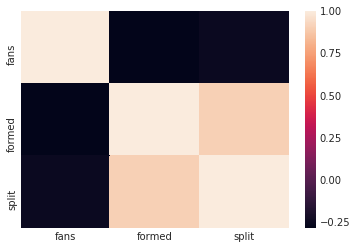

In [331]:
import seaborn as sns
corr = bands.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [332]:
styles = set()
for s in bands['style']:
    for sub in s.split(','):
        styles.add(sub)
len(styles)

297

Now let's split *style* column and turn in into vector using built-in one hot encoding pandas function:

In [333]:
encoded = pd.get_dummies(bands['style'].str.split(',', expand=True).stack(), prefix='st').groupby(level=0).sum()
encoded.head()

st_A  st_Acoustic  st_Acoustic folk  st_Acoustic rock  st_Adult  \
0     0            0                 0                 0         0   
1     0            0                 0                 0         0   
2     0            0                 0                 0         0   
3     0            0                 0                 0         0   
4     0            0                 0                 0         0   

   st_Aggrotech  st_Alternative  st_Alternative rock  st_Alternative thrash  \
0             0               0                    0                      0   
1             0               0                    0                      0   
2             0               0                    0                      0   
3             0               0                    0                      0   
4             0               0                    0                      0   

   st_Ambient    ...     st_Teutonic thrash  st_Thrash  st_Trancecore  \
0           0    ...                      0          0              0   
1           0    ...                      0          0              0   
2           0    ...                      0          0              0   
3           0    ...                      0          1              0   
4           0    ...                      0          0              0   

   st_Trip-  st_Us heavy  st_Us power  st_Viking black  st_Viking folk  \
0         0            0            0                0               0   
1         0            0            0                0               0   
2         0            0            0                0               0   
3         0            0            0                0               0   
4         0            0            0                0               0   

   st_Wave  st_Wave   
0        0         0  
1        0         0  
2        0         0  
3        0         0  
4        0         0  

[5 rows x 297 columns]

Then drop original *style* column and concat original dataframe with df that contains encoded style features. 

In [334]:
bands = bands.drop('style', axis=1)
bands = pd.concat([bands, encoded], axis = 1)

In [335]:
bands.describe(include=['object'])

band_name origin
count       5000   5000
unique      4949    114
top      Pantera    USA
freq           2   1139

As we can see, origin country column are also categorical. But this data can be converted into integer numbers without one hot encoding. <br>
Let's convert them into codes and add that column to dataframe.

In [336]:
bands.origin = pd.Categorical(bands.origin)
bands['origin_encoded'] = bands.origin.cat.codes

So, now we have valid and clean information about 5000 metal bands. 
Let's dive into our data a little bit

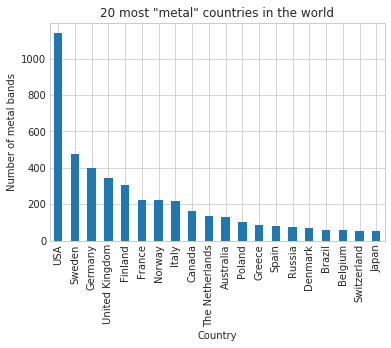

In [337]:
barplt = bands.groupby('origin')['band_name'].count().nlargest(20).plot.bar()
barplt.set_title('20 most "metal" countries in the world')
barplt.set_xlabel('Country')
barplt.set_ylabel('Number of metal bands')
pass

As shown in the graph US is leading for the number of metal bands. In Europe, the countries raiting is much denser. Sweden is in the lead, followed by Germany and Great Britain. In the last place in our top-20 is Japan.

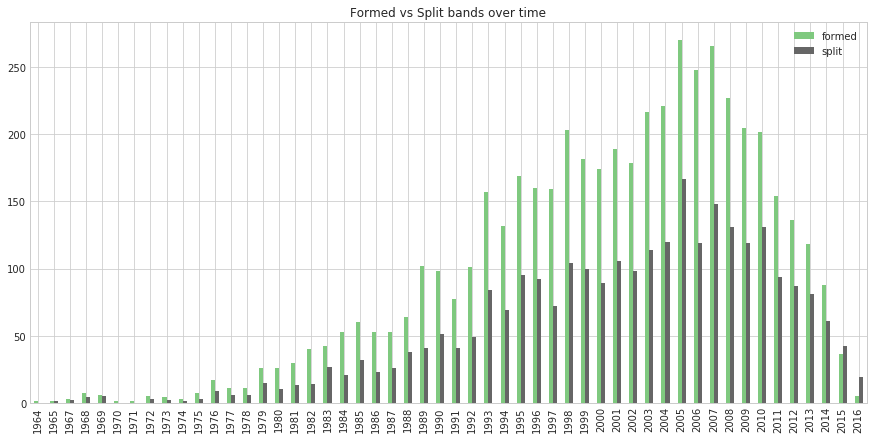

In [338]:
formed = bands.groupby(['formed'])['formed'].count()
split = bands.groupby(['split'])['split'].count()
fsdf = pd.concat([formed, split], axis=1)
fsplot = fsdf.plot(kind='bar', figsize=(15, 7), colormap='Accent', title='Formed vs Split bands over time')

As we can see at this plot, the most productive time for metal was in 2000-2010 when the most of the bands was formed.  

Let's create a little wordcloud, to see what words are most often found in the names o metal bands. <br>
To generate it we can use this lib: https://github.com/amueller/word_cloud 

In [339]:
#!pip install wordcloud
#conda install -c https://conda.anaconda.org/amueller wordcloud
from wordcloud import WordCloud

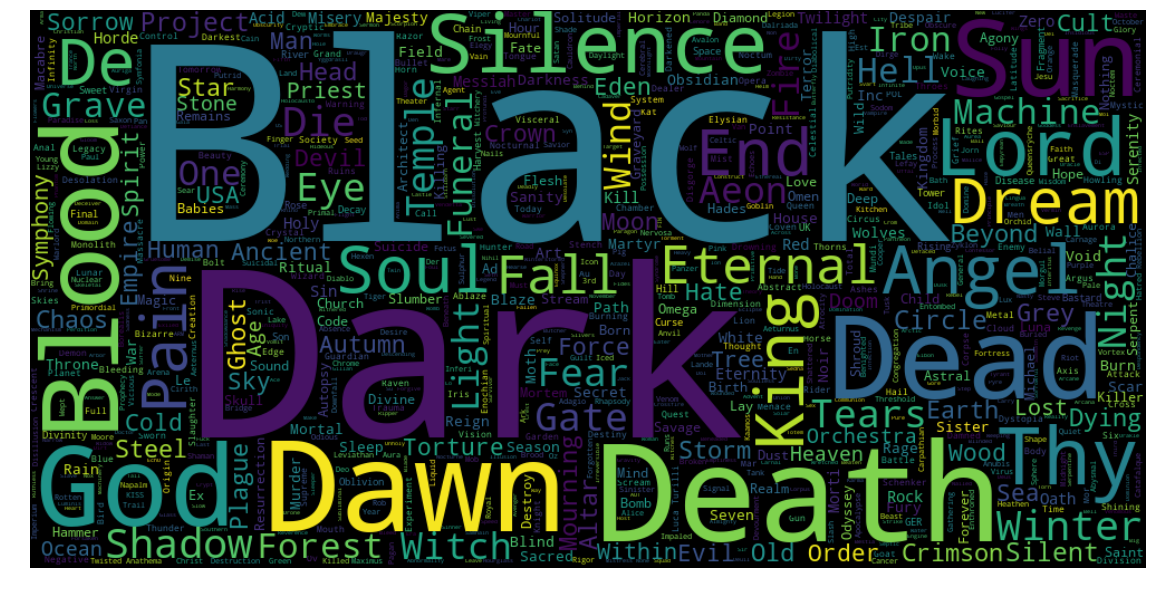

In [340]:
names = ''.join([name + ' ' for name in bands.band_name])
wordcloud = WordCloud(width=1000, height=500, max_words=1000).generate(names)

# Display the generated image:
fig = plt.figure(figsize = (20,30)) # create a 5 x 5 figure 
ax = fig.add_subplot(111)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.show()

What an inspiring dataset! :)

Задача: 

**Выясним сколько лет просуществовала группа**

Выделим _target_ нашего датасета

In [341]:
bands = bands.drop(['origin', 'origin_encoded'], axis=1)

Датасет был выложен в феврале 2017 года. Будем считать, что все группы, для которых не указан год распада - успешно существовали до 2017.

In [343]:
bands

band_name  fans  formed   split  st_A  st_Acoustic  \
0               Iron Maiden  4195    1975     NaN     0            0   
1                     Opeth  4147    1990  1990.0     0            0   
2                 Metallica  3712    1981     NaN     0            0   
3                  Megadeth  3105    1983  1983.0     0            0   
4               Amon Amarth  3054    1988     NaN     0            0   
5                    Slayer  2955    1981  1981.0     0            0   
6                     Death  2690    1983  2001.0     0            0   
7             Dream Theater  2329    1985  1985.0     0            0   
8             Black Sabbath  2307    1968     NaN     0            0   
9                 Nightwish  2183    1996  1996.0     0            0   
10        Children Of Bodom  2153    1993     NaN     0            0   
11             Judas Priest  2094    1969  1969.0     0            0   
12           Blind Guardian  2040    1984     NaN     0            0   
13                In Flames  1932    1990  1990.0     0            0   
14                  Pantera  1920    1981  2003.0     0            0   
15        Dark Tranquillity  1898    1989  1989.0     0            0   
16                 Agalloch  1881    1995  2016.0     0            0   
17                Ensiferum  1879    1995  1995.0     0            0   
18               Arch Enemy  1750    1996     NaN     0            0   
19                Katatonia  1735    1991  1991.0     0            0   
20                 Behemoth  1721    1991     NaN     0            0   
21             Dimmu Borgir  1688    1993  1993.0     0            0   
22                  Kreator  1646    1982     NaN     0            0   
23                Wintersun  1640    2004  2004.0     0            0   
24                Insomnium  1547    1997     NaN     0            0   
25                 Amorphis  1528    1990  1990.0     0            0   
26                  Kamelot  1520    1991     NaN     0            0   
27                     Tool  1506    1988  1988.0     0            0   
28                Helloween  1501    1978     NaN     0            0   
29                Testament  1500    1983  1983.0     0            0   
...                     ...   ...     ...     ...   ...          ...   
4970     Your Chance To Die     1    2007     NaN     0            0   
4971    Your Tomorrow Alone     1    2009  2009.0     0            0   
4972                   ?rec     1    2004     NaN     0            0   
4973                Ömheten     0    2012  2012.0     0            0   
4974             (In)Trance     0    2009     NaN     0            0   
4975          6th Dimension     0    2008  2008.0     0            0   
4976            9.7 Richter     0    2006     NaN     0            0   
4977           A Lower Deep     0    2000  2000.0     0            0   
4978  Absence Of The Sacred     0    2005     NaN     0            0   
4979          Ace Of Hearts     0    2008  2008.0     0            0   
4980      Aeturnus Dominion     0    2003     NaN     0            0   
4981       Algy Ward's Tank     0    2007  2007.0     0            0   
4982        Altars Of Grief     0    2013     NaN     0            0   
4983               Anatomia     0    2002  2002.0     0            0   
4984           Anger As Art     0    2004     NaN     0            0   
4985                 Angist     0    2009  2009.0     0            0   
4986                  Anmod     0    2005     NaN     0            0   
4987      Apokalyptic Raids     0    1997  1997.0     0            0   
4988             Apothesary     0    2009     NaN     0            0   
4989              Apparatus     0    2012  2012.0     0            0   
4990         Arctic Spirits     0    2003     NaN     0            0   
4991             Argus (Ro)     0    1996  1996.0     0            0   
4992                 Arrest     0    1992     NaN     0            0   
4993   As I Lay Dying (AUT)     0    1991  1991.0     0   

In [318]:
bands.loc[bands.index, 'formed'] = pd.to_datetime(bands['formed'], format='%Y')
bands['split'].fillna(2017, inplace=True)
bands.loc[bands.index, 'split'] = pd.to_datetime(bands['split'].astype('int64'), format='%Y')

In [320]:
#bands['lifetime']
#bands[['split', 'formed']]

bands['split'] - bands['formed']

0      15341 days
1          0 days
2      13149 days
3          0 days
4      10593 days
5          0 days
6       6575 days
7          0 days
8      17898 days
9          0 days
10      8766 days
11         0 days
12     12054 days
13         0 days
14      8035 days
15         0 days
16      7670 days
17         0 days
18      7671 days
19         0 days
20      9497 days
21         0 days
22     12784 days
23         0 days
24      7305 days
25         0 days
26      9497 days
27         0 days
28     14245 days
29         0 days
          ...    
4970    3653 days
4971       0 days
4972    4749 days
4973       0 days
4974    2922 days
4975       0 days
4976    4018 days
4977       0 days
4978    4383 days
4979       0 days
4980    5114 days
4981       0 days
4982    1461 days
4983       0 days
4984    4749 days
4985       0 days
4986    4383 days
4987       0 days
4988    2922 days
4989       0 days
4990    5114 days
4991       0 days
4992    9132 days
4993       0 days
4994    62

In [146]:
import numpy as np
bands['is_splitted'] = bands.split.map(lambda x: 0 if np.isnan(x) else 1)

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = \
train_test_split(bands.drop(['band_name','origin', 'split', 'is_splitted'], axis=1), \
                 bands['is_splitted'], test_size=0.2)

Для оценки качества бинарной классификации будем пользоваться площадью под ROC кривой (auc)

In [149]:
def generate_results(y_test, y_score):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = {0:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()
    print('AUC: {0}'.format(roc_auc))

### kNN

In [150]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(leaf_size=5)

In [151]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Predicting on test data
Generating results


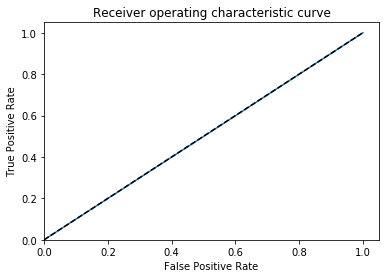

AUC: 0.4993805425143454


In [152]:
print('Predicting on test data')
y_score = neigh.predict(X_test)

print('Generating results')
generate_results(y_test, y_score)

In [153]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

Accuracy: 54.70


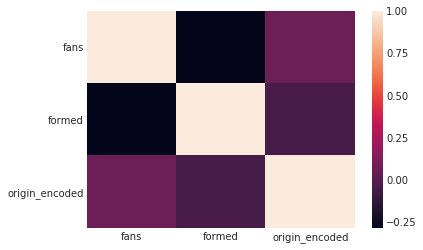

In [164]:
import seaborn as sns
corr = bands[['fans', 'formed', 'origin_encoded']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fans  formed  origin_encoded
0     4195    1975             110
1     4147    1990              97
2     3712    1981             106
3     3105    1983             106
4     3054    1988              97
5     2955    1981             106
6     2690    1983             106
7     2329    1985             106
8     2307    1968             110
9     2183    1996              33
10    2153    1993              33
11    2094    1969             110
12    2040    1984              37
13    1932    1990              97
14    1920    1981             106
15    1898    1989              97
16    1881    1995             106
17    1879    1995              33
18    1750    1996              97
19    1735    1991              97
20    1721    1991              81
21    1688    1993              78
22    1646    1982              37
23    1640    2004              33
24    1547    1997              33
25    1528    1990              33
26    1520    1991             106
27    1506    1988             106
28    1501    1978              37
29    1500    1983             106
...    ...     ...             ...
4970     1    2007             106
4971     1    2009              56
4972     1    2004              26
4973     0    2012              97
4974     0    2009              86
4975     0    2008              25
4976     0    2006              85
4977     0    2000             106
4978     0    2005              90
4979     0    2008             110
4980     0    2003               4
4981     0    2007             110
4982     0    2013              17
4983     0    2002              58
4984     0    2004             106
4985     0    2009              44
4986     0    2005              15
4987     0    1997              15
4988     0    2009             106
4989     0    2012              27
4990     0    2003              41
4991     0    1996              85
4992     0    1992              37
4993     0    1991               6
4994     0    2000              56
4995     0    2006              35
4996     0    2003              24
4997     0    2006             110
4998     0    1983               4
4999     0    2014              97

[5000 rows x 3 columns]